## Домашняя работа 3

Аксенова Анна БКЛ182

Здесь кусочек кода из прошлого домашнего задания, чтобы не продолжать в том же ноутбуке (его можно пролистать)

In [50]:
with open("idu-na-grozu.txt", encoding='utf-8') as fh:
    text = fh.read()

Очищаем его от пунктуации (punctuation из string мне кажется недостаточной):

In [51]:
punctuation = (list(""".,…;:!”?$%^&*№()_—=+|[]{}\"/<>`~±§«»°1234567890""")
               + ['- ', ' -', ' - ', " '", "' "])
for char in punctuation:
    text = text.replace(char, ' ')

**Задание 2** 

Импортируем библиотеки и модули.

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer

Считаем время работы программы по обработке текста

In [53]:
tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
# Выбираем все строки из букв,
# приводим их к нижнему регистру и токенизируем
morph = MorphAnalyzer()
morph_tokens = []
# Делаем список из самых вероятных морфологических характеристик токенов
for token in tokens:
    first = morph.parse(token)[0]
    morph_tokens.append(first)

In [54]:
lemmas = []
# Для каждого токена находим лемму и часть речи
for token in morph_tokens:
    lemm = (token.word, (token.normal_form, token.tag.POS))
    lemmas.append(lemm)

# а этот список лемм нам понадобится в новом ДЗ    
list_of_lemmas = [lemm[1][0] for lemm in lemmas] 

**Задание 4**


Распечатаем все части речи с их частотностью в тексте, не убирая стоп-слова

In [55]:
from collections import Counter
POS = []
for lemma in lemmas:
    POS.append(lemma[1][1])
POS = Counter(POS)

Теперь, чтобы получить содержательный результат, уберем стоп-слова.

Найдем самые частотные глаголы и наречия.

In [56]:
from nltk.corpus import stopwords

sw = stopwords.words('russian')
filtered = [l[1] for l in lemmas if l[1][0] not in sw]

In [57]:
verbs = []
adverbs = []
for lemma in filtered:
    if lemma[1] == "VERB":
        verbs.append(lemma[0])
    elif lemma[1] == "ADVB":
        adverbs.append(lemma[0])
verbs = Counter(verbs).most_common()
adverbs = Counter(adverbs).most_common()

# Продолжение домашнего задания 2 (ДЗ 3)

Импортируем matplotlib

In [58]:
import matplotlib.pyplot as plt

### Графики, посторенные на семинаре

Построим график, сопоставляющий самые частотные глаголы и количество их употреблений

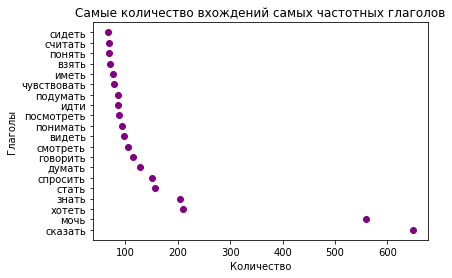

In [82]:
Y = [i[0] for i in verbs[:20]]
X = [i[1] for i in verbs[:20]]
plt.scatter(X, Y, color='purple', label='verbs') 
plt.title('Самые количество вхождений самых частотных глаголов')
plt.ylabel('Глаголы')
plt.xlabel('Количество')
plt.show()

Построим столбчатую диаграмму с количеством вхождений каждого из 20 самых частотных наречий

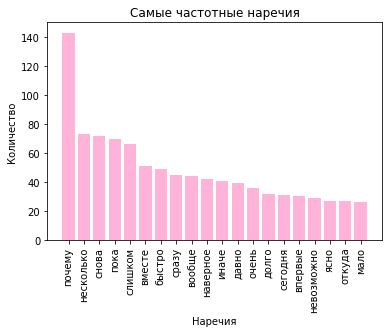

In [60]:
Y = [i[0] for i in adverbs[:20]]
X = [i[1] for i in adverbs[:20]]
plt.bar(Y, X, color='#ffb3d9')
plt.xticks(rotation='vertical')
plt.title('Самые частотные наречия')
plt.ylabel('Количество')
plt.xlabel('Наречия')
plt.show()

Построим круговую диаграмму соотношения количества частей речи в тексте

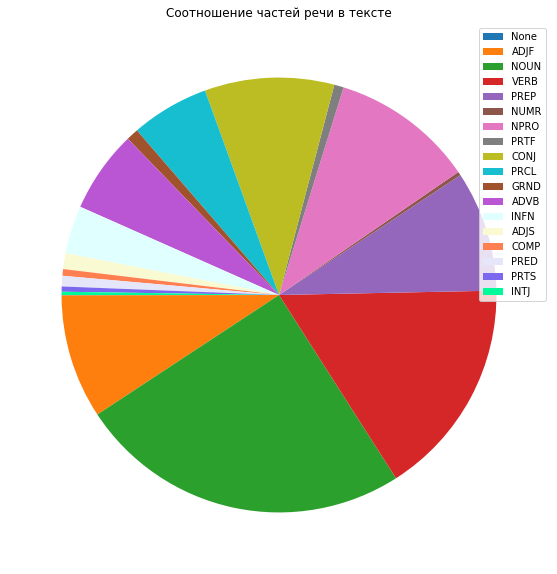

In [61]:
labels = [str(i) for i in POS.keys()]
sizes = list(POS.values())
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', '#A0522D',
          '#BA55D3', '#E0FFFF', '#FAFAD2', '#FF7F50', '#E6E6FA', '#7B68EE', '#00FA9A']
# я задала цвета вручную, потому что дефолтных цветов в pyplot не хватает
plt.figure(figsize=(10, 10)) #  увеличиваем размер диаграмы
plt.title('Соотношение частей речи в тексте')
plt.pie(sizes, colors=colors, startangle=180)
plt.legend(labels, loc="best")
plt.show()

Прошлые графики посторены на основе данных из предыдущего домашнего задания

Теперь преобразуем данные в дата фрейм

In [62]:
# Функция преобразует анализ pymorphy в единообразный словарь

def parse(x):
    a = {'word' : x[0], 'lemm' : x.normal_form, 'POS' : x.tag.POS, 'case' : x.tag.case , 'number' : x.tag.number,
         'gender' : x.tag.gender, 'animacy' : x.tag.animacy , 'aspect' : x.tag.aspect, 
         'transitivity' : x.tag.transitivity, 'person' : x.tag.person, 
         'tense' : x.tag.tense, 'mood' : x.tag.mood, 'involvement' : x.tag.involvement, 
         'voice' : x.tag.voice}
    return a

In [63]:
# Создаем список из однообразных словарей для каждого слова 

table = []
for token in morph_tokens:
    table.append(parse(token))

Теперь, собственно, создаем датафрейм и работаем с ним

In [64]:
import pandas as pd

In [65]:
df = pd.DataFrame(table)
# Записываем в файл
df.to_csv('ing.csv', sep='\t', index=False)

In [66]:
#  Посмотрим, как выглядит наш датафрейм
granin = pd.read_csv('ing.csv', sep='\t').fillna('')
granin.head(20)

,word,lemm,POS,case,number,gender,animacy,aspect,transitivity,person,tense,mood,involvement,voice
0,lib,lib,,,,,,,,,,,,
1,ru,ru,,,,,,,,,,,,
2,электронная,электронный,ADJF,nomn,sing,femn,,,,,,,,
3,библиотека,библиотека,NOUN,nomn,sing,femn,inan,,,,,,,
4,название,название,NOUN,nomn,sing,neut,inan,,,,,,,
5,книги,книга,NOUN,gent,sing,femn,inan,,,,,,,
6,иду,идти,VERB,,sing,,,impf,intr,1per,pres,indc,,
7,на,на,PREP,,,,,,,,,,,
8,грозу,гроза,NOUN,accs,sing,femn,inan,,,,,,,
9,автор,автор,NOUN,nomn,sing,masc,anim,,,,,,,


### Графики на основе дата фрейма

Построим столбчатую диаграмму с частотностью употребления предлогов

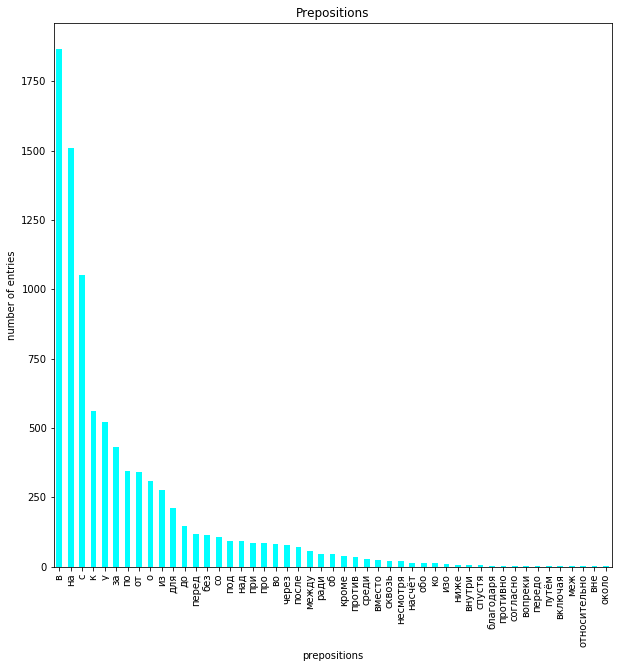

In [67]:
plt.figure(figsize=(10, 10))
granin[granin['POS'] == 'PREP']['word'].value_counts().plot.bar(color='cyan')
plt.title('Prepositions')
plt.xlabel('prepositions')
plt.ylabel('number of entries');

Построим WordCloud для нашего текста

In [68]:
# Импотируем библиотеки

import nltk 
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [69]:
# Расширим список стоп-слов

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

In [70]:
# Открываем картинку для создания формы облака
import numpy as np
from PIL import Image

cloud_mask = np.array(Image.open("./cloud.png"))

In [71]:
import random

# Функция создает набор оттенков голубого для нашего облака
def blue_color_func(word, font_size, position, orientation, font_path, random_state=None):
    return "hsl(228, 77%%, %d%%)" % random.randint(40, 90)

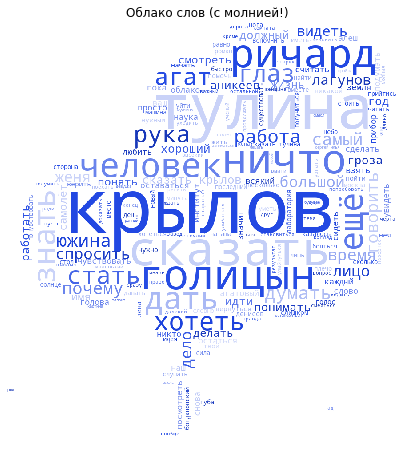

In [72]:
# Строим само облако

text = ' '.join([word for word in granin['lemm'].values if word not in stops])
wordcloud = WordCloud(
    background_color ='white',
    mask=cloud_mask
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func = blue_color_func))
plt.axis("off") 
plt.title('Облако слов (с молнией!)')
plt.show()

Облако из слов текста об облаках:)

### Dispersion plot

Я скопировала и немного переопределила функцию *dispersion*, в частности, изменила шкалу по оси Х, подписи и цвет маркеров

In [80]:
def dispersion(text, words, ignore_case=False, title="Lexical Dispersion Plot (main characters)"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError(
            'The plot function requires matplotlib to be installed.'
            'See http://matplotlib.org/'
        )

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [
        (x, y)
        for x in range(len(text_to_comp))
        for y in range(len(words_to_comp))
        if text_to_comp[x] == words_to_comp[y]
    ]
    
    if points:
        x, y = list(zip(*points))
        
    else:
        x = y = ()
    pylab.plot(x, y, "m|")
    pylab.yticks(list(range(len(words))), words, color="m")
    pylab.ylim(-1, len(words))
    pylab.xlim (-1, len(text))
    pylab.title(title)
    pylab.xlabel("Words in text")
    pylab.show()

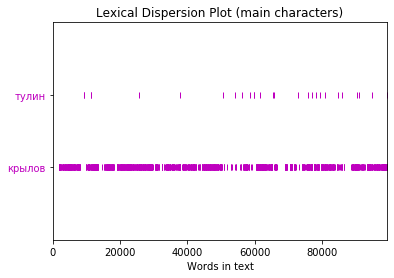

In [81]:
dispersion(list_of_lemmas, ['тулин', 'крылов'])

Этот график отражает упоминание имен главных героев в тексте